# Pathrise

Pathrise, a recruitment agency, provides a program designed to assist job seekers get the best possible jobs in tech. According to data of fellows getting involved in Pathrise's program in the past, the project has two main objectives:       
1.Classification: Will a fellow be placed?                            
2.Regression: How long will it take the fellow to be placed?

## Dataset Information

### Import Required Libreries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

### Reading the Dataset

In [2]:
df=pd.read_excel('Data_Pathrise.xlsx')

In [3]:
df

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,2540,Withdrawn (Failed),Design,JUN18A,457.0,0,Contractor,Master's Degree,6 months to a year,Technical interviewing,5+ years,Citizen,4.0,15,Male,Non-Hispanic White or Euro-American
2540,2541,Withdrawn (Failed),Data,JAN19B,488.0,0,NaN,Master's Degree,3-5 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,1.0,7,Male,Non-Hispanic White or Euro-American
2541,2542,Active,SWE,SEP18C,NaN,0,Contractor,Bachelor's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,1.0,30,Female,Non-Hispanic White or Euro-American
2542,2543,Active,SWE,MAY18A,NaN,0,NaN,Master's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,2.0,10,Male,Decline to Self Identify


### Data Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   int64  
 1   pathrise_status              2544 non-null   object 
 2   primary_track                2544 non-null   object 
 3   cohort_tag                   2536 non-null   object 
 4   program_duration_days        1928 non-null   float64
 5   placed                       2544 non-null   int64  
 6   employment_status            2315 non-null   object 
 7   highest_level_of_education   2486 non-null   object 
 8   length_of_job_search         2470 non-null   object 
 9   biggest_challenge_in_search  2520 non-null   object 
 10  professional_experience      2322 non-null   object 
 11  work_authorization_status    2260 non-null   object 
 12  number_of_interviews         2326 non-null   float64
 13  number_of_applicat

In [5]:
df.describe(include='all')

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
count,2544.000000,2544,2544,2536,1928.000000,2544.000000,2315,2486,2470,2520,2322,2260,2326.000000,2544.000000,2052,2526
unique,NaN,9,6,47,NaN,NaN,5,7,5,10,4,9,NaN,NaN,4,9
top,NaN,Placed,SWE,JAN19A,NaN,NaN,Student,Bachelor's Degree,Less than one month,Hearing back on my applications,1-2 years,Citizen,NaN,NaN,Male,East Asian or Asian American
freq,NaN,956,1678,132,NaN,NaN,775,1361,815,1002,882,1104,NaN,NaN,1492,900
mean,1272.500000,NaN,NaN,NaN,136.098548,0.375786,NaN,NaN,NaN,NaN,NaN,NaN,2.182287,36.500786,NaN,NaN
std,734.533866,NaN,NaN,NaN,125.860248,0.484420,NaN,NaN,NaN,NaN,NaN,NaN,2.959273,53.654896,NaN,NaN
min,1.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
25%,636.750000,NaN,NaN,NaN,14.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,9.000000,NaN,NaN
50%,1272.500000,NaN,NaN,NaN,112.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,NaN,NaN
75%,1908.250000,NaN,NaN,NaN,224.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,45.000000,NaN,NaN


In [6]:
df.corr()

,id,program_duration_days,placed,number_of_interviews,number_of_applications
id,1.000000,0.041449,-0.035391,-0.015318,-0.072675
program_duration_days,0.041449,1.000000,0.197222,-0.065043,-0.064783
placed,-0.035391,0.197222,1.000000,-0.007156,-0.028364
number_of_interviews,-0.015318,-0.065043,-0.007156,1.000000,0.071406
number_of_applications,-0.072675,-0.064783,-0.028364,0.071406,1.000000


### Missing Values Analysis

In [7]:
missing_values=df.isnull().sum().sort_values(ascending=False)
percent_missing=(missing_values/len(df))*100
percent_missing_round=(round(percent_missing, 1)).sort_values(ascending=False)
missing_data=pd.concat([missing_values,percent_missing_round],axis=1,keys=['Total','Percent(%)'])
print(missing_data)

                             Total  Percent(%)
program_duration_days          616        24.2
gender                         492        19.3
work_authorization_status      284        11.2
employment_status              229         9.0
professional_experience        222         8.7
number_of_interviews           218         8.6
length_of_job_search            74         2.9
highest_level_of_education      58         2.3
biggest_challenge_in_search     24         0.9
race                            18         0.7
cohort_tag                       8         0.3
id                               0         0.0
pathrise_status                  0         0.0
primary_track                    0         0.0
placed                           0         0.0
number_of_applications           0         0.0


## Preprocessing

### Cleaning

#### Looking at Fellow Placement

The following chart indicates that the 'Target' is unbalanced.

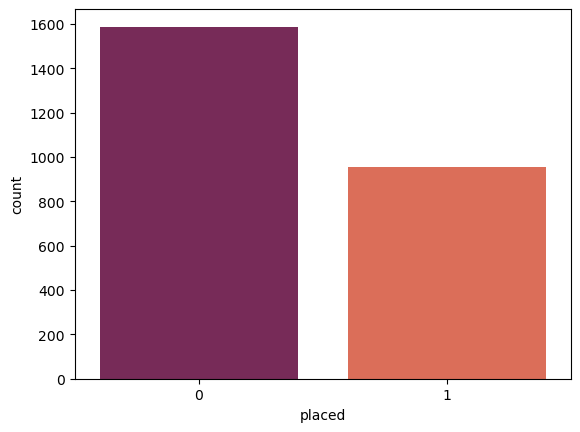

In [8]:
sns.countplot(x='placed',data=df,palette='rocket')
plt.show()

#### Pathrise_Status vs. Placed

The following chart shows that the 'pathrise_status' column includes multiple categories, one of which is 'placed',leading to overlap with the 'target' column and the potential for overfitting. To address this issue, this column will be removed.

Text(0.5, 1.0, 'count plot')

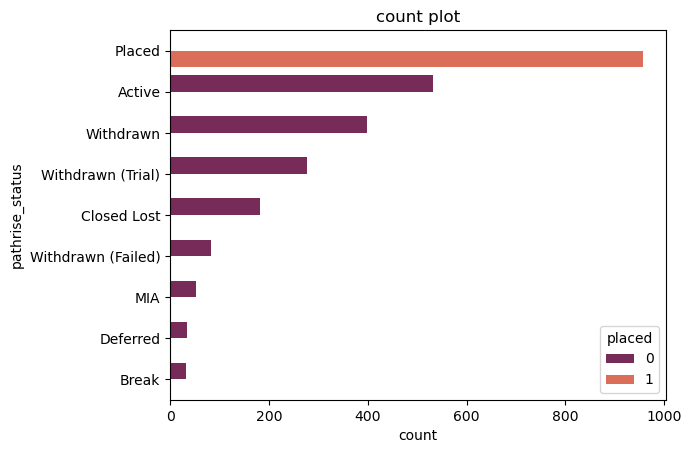

In [9]:
sns.countplot(data=df,y='pathrise_status',hue='placed',palette='rocket',order=df['pathrise_status'].value_counts().index)
plt.title('count plot')

In [10]:
df['pathrise_status'].value_counts()

Placed                956
Active                532
Withdrawn             398
Withdrawn (Trial)     276
Closed Lost           182
Withdrawn (Failed)     82
MIA                    52
Deferred               34
Break                  32
Name: pathrise_status, dtype: int64

The majority of fellows who were missing program duration information were found to have an 'Active' status.    
                                                                                                                  The three observed statuses were: Active, Break, MIA

In [11]:
df2=df[df['program_duration_days'].isnull()]

In [12]:
df2['pathrise_status'].value_counts()

Active    532
MIA        52
Break      32
Name: pathrise_status, dtype: int64

In [13]:
df.drop(df[df['pathrise_status']=='Active'].index, axis=0, inplace=True)
df.drop(df[df['pathrise_status']=='Break'].index, axis=0, inplace=True)
df.drop(df[df['pathrise_status']=='MIA'].index,axis=0, inplace=True)

#### Balanced Target(Placed)

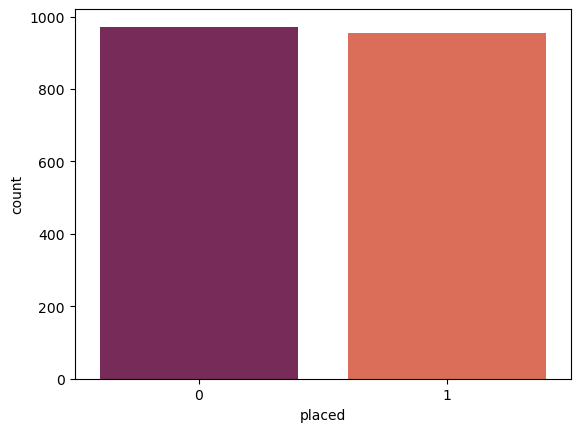

In [14]:
sns.countplot(x='placed',data=df,palette='rocket')
plt.show()

#### Removing Unnecessary Features 

In [15]:
df=df.drop(['id','pathrise_status','cohort_tag'],axis=1)

## Exploratory Data Analysis (EDA)

### Categorical Features vs. Target Variable (Placed)

In [16]:
Categorical=[]
for col in df.columns:
    Categorical.append(col.strip())
df.columns=Categorical

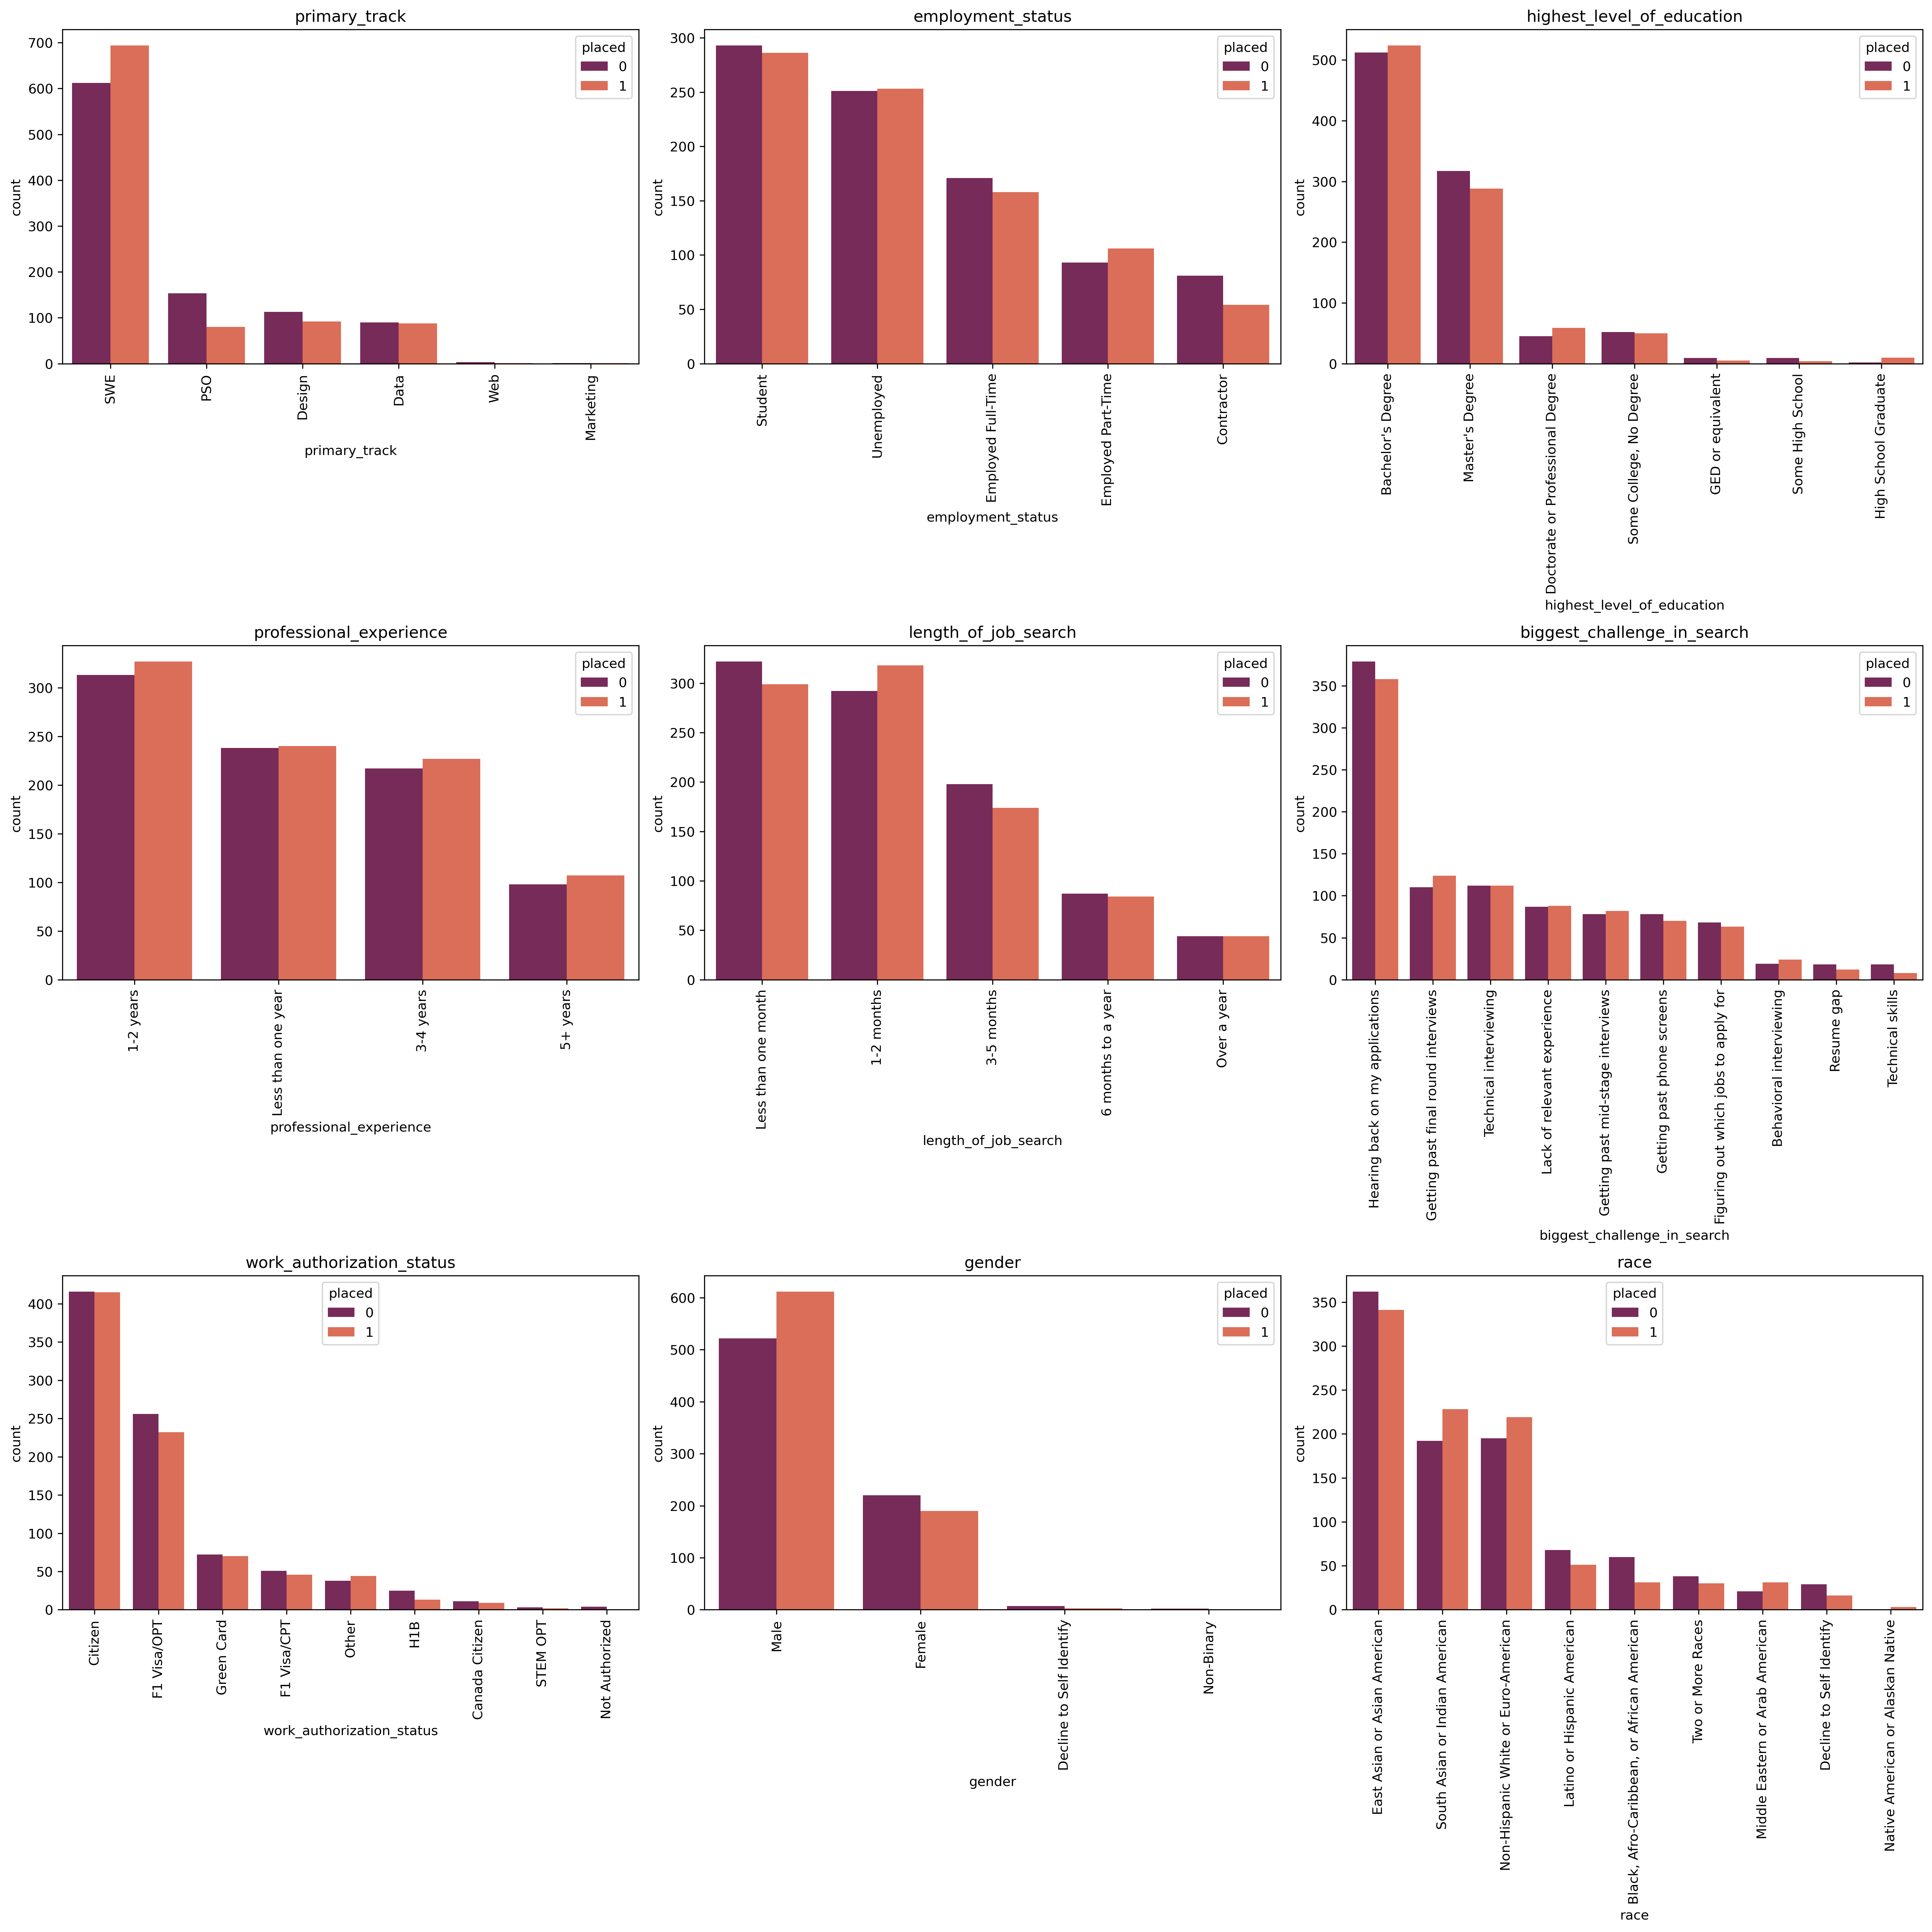

In [17]:
Categorical=['primary_track','employment_status','highest_level_of_education', 'professional_experience',
             'length_of_job_search','biggest_challenge_in_search','work_authorization_status', 'gender', 'race']
plt.figure(figsize=(20,20),dpi=300,layout='constrained')
for i,j in enumerate(Categorical):
    plt.subplot(3,3,i+1)
    sns.countplot(data=df,x=j,hue='placed',palette='rocket',order=df[j].value_counts().index)
    plt.title(j)
    plt.xticks(rotation=90)

In [18]:
Categorical=['primary_track','employment_status','highest_level_of_education', 'professional_experience',
             'length_of_job_search','biggest_challenge_in_search','work_authorization_status', 'gender', 'race']
rows=3
cols=3
fig, ax=plt.subplots(nrows=rows,ncols=cols,figsize=(30,30),dpi=300)
colors=sns.color_palette('flare')
for i,j in enumerate(Categorical):
    row=i%rows
    col=i//rows
    df_pie=df[[j,'placed']]
    df_pie=df_pie[df['placed']==1]
    labels=df_pie[j].value_counts().index
    data=df_pie[j].value_counts().values
    max_value=max(df_pie[j].value_counts().values)
    explode=[0.1*int(i/max_value) for i in data]
    ax[row,col].set_title('placed/{}'.format(j))
    ax[row,col].pie(data,labels=labels,autopct='%.0f%%',explode=explode,colors=colors)
    inner_circle=plt.Circle((0,0),0.4,color='white')
    ax[row,col].add_artist(inner_circle)

### Numerical Features vs. Target Variable (Placed)

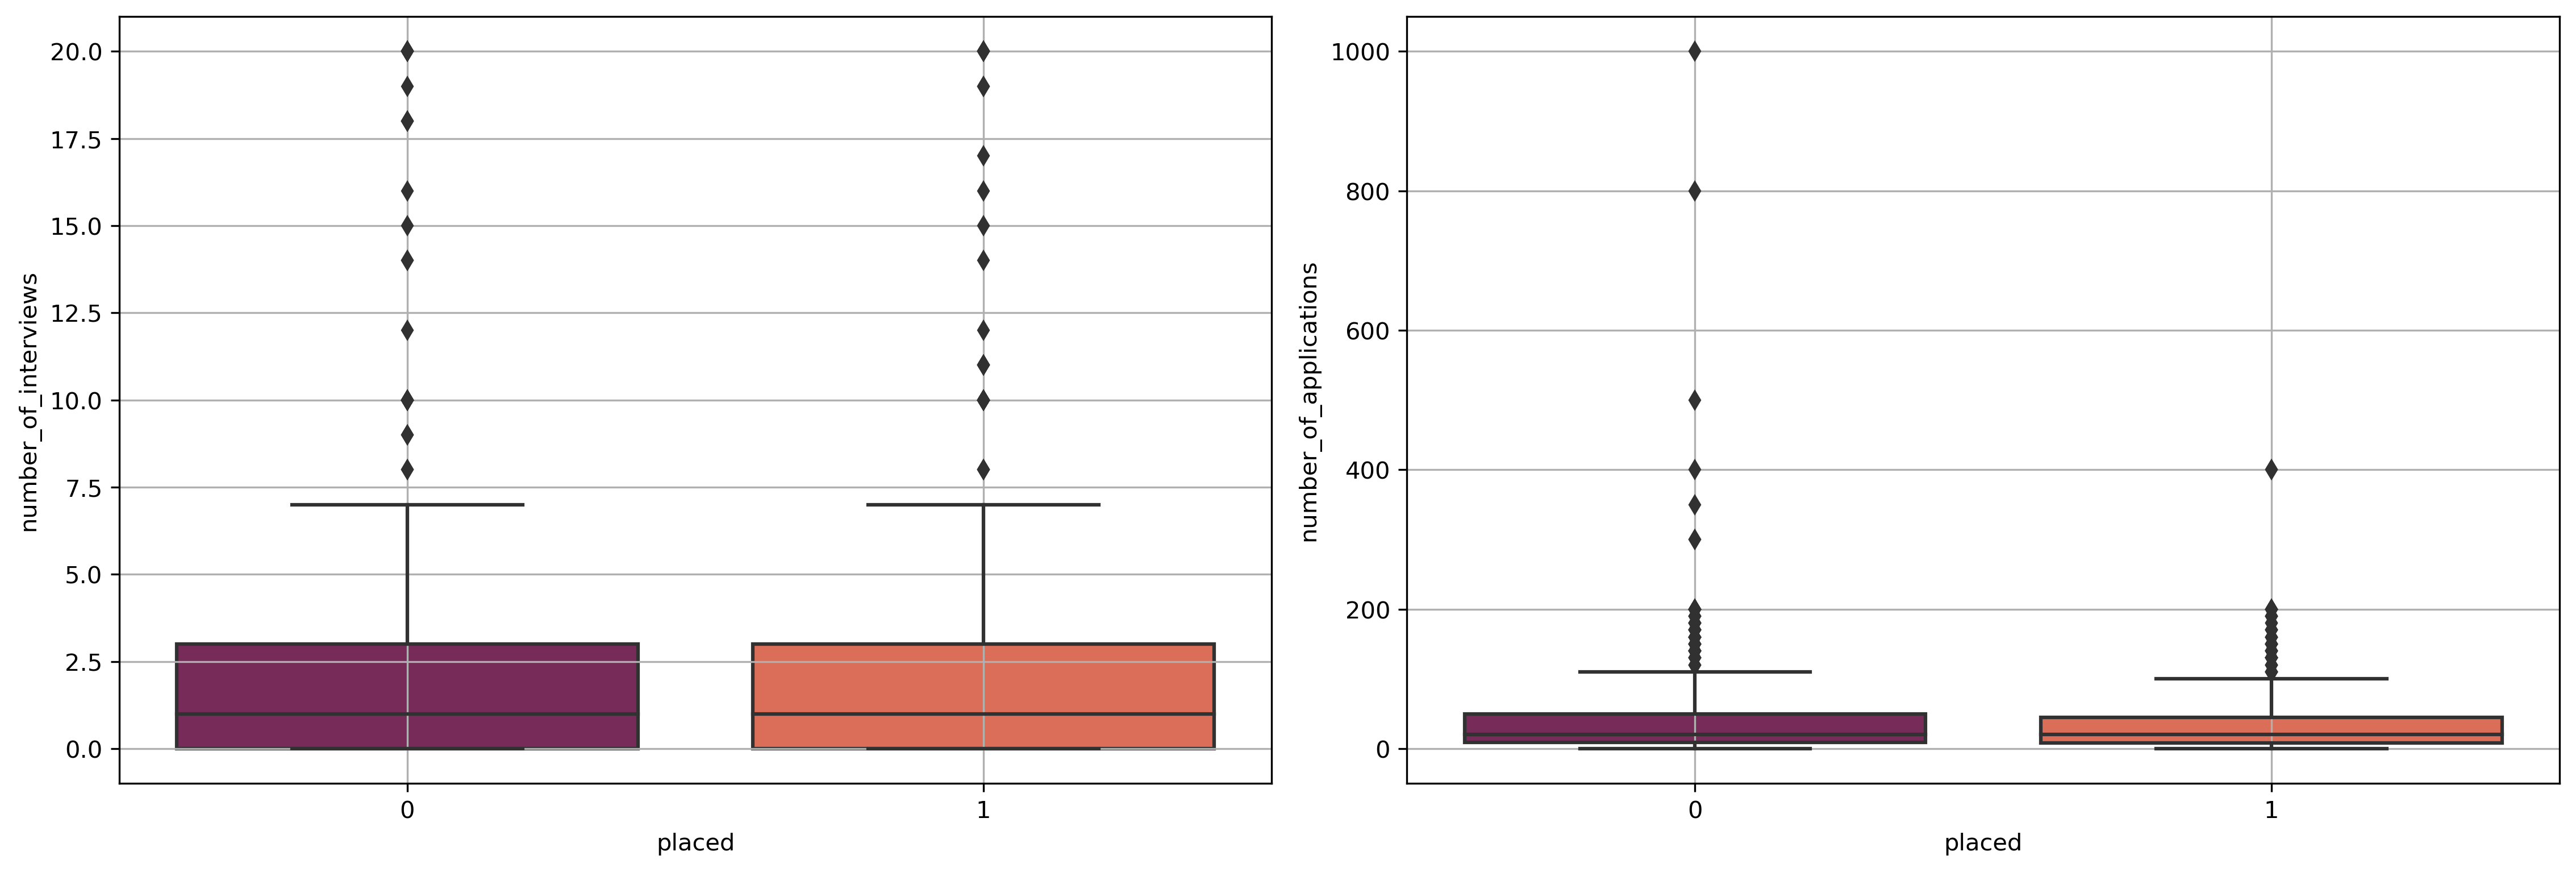

In [19]:
Numerical=['number_of_interviews','number_of_applications']
plt.figure(figsize=(15,5),dpi=300,layout='constrained')
for i,j in enumerate(Numerical):
    plt.subplot(1,2,i+1)
    sns.boxplot(data=df,y=j,x='placed',palette='rocket')
    plt.grid()

In [20]:
def plot_missing_data(df,color=sns.color_palette('rocket')):
  
    missing=df.isnull().sum()
    missing=missing[missing > 0]
    missing.sort_values(inplace=True,ascending=False)

    ax=missing.plot(kind='bar',figsize=(20,10),color=color)
    ax.set_alpha(0.8)
    ax.set_title('Missing Values')
    ax.set_ylabel('Count')
    ax.set_xlabel('Features')

    # Set frequency text
    for i in ax.patches:
        ax.text(i.get_x(),i.get_height()+10,\
                str(round((i.get_height()/len(df))*100, 1))+'%',fontsize=15,
                    color='black')

### Missing Values Plot 

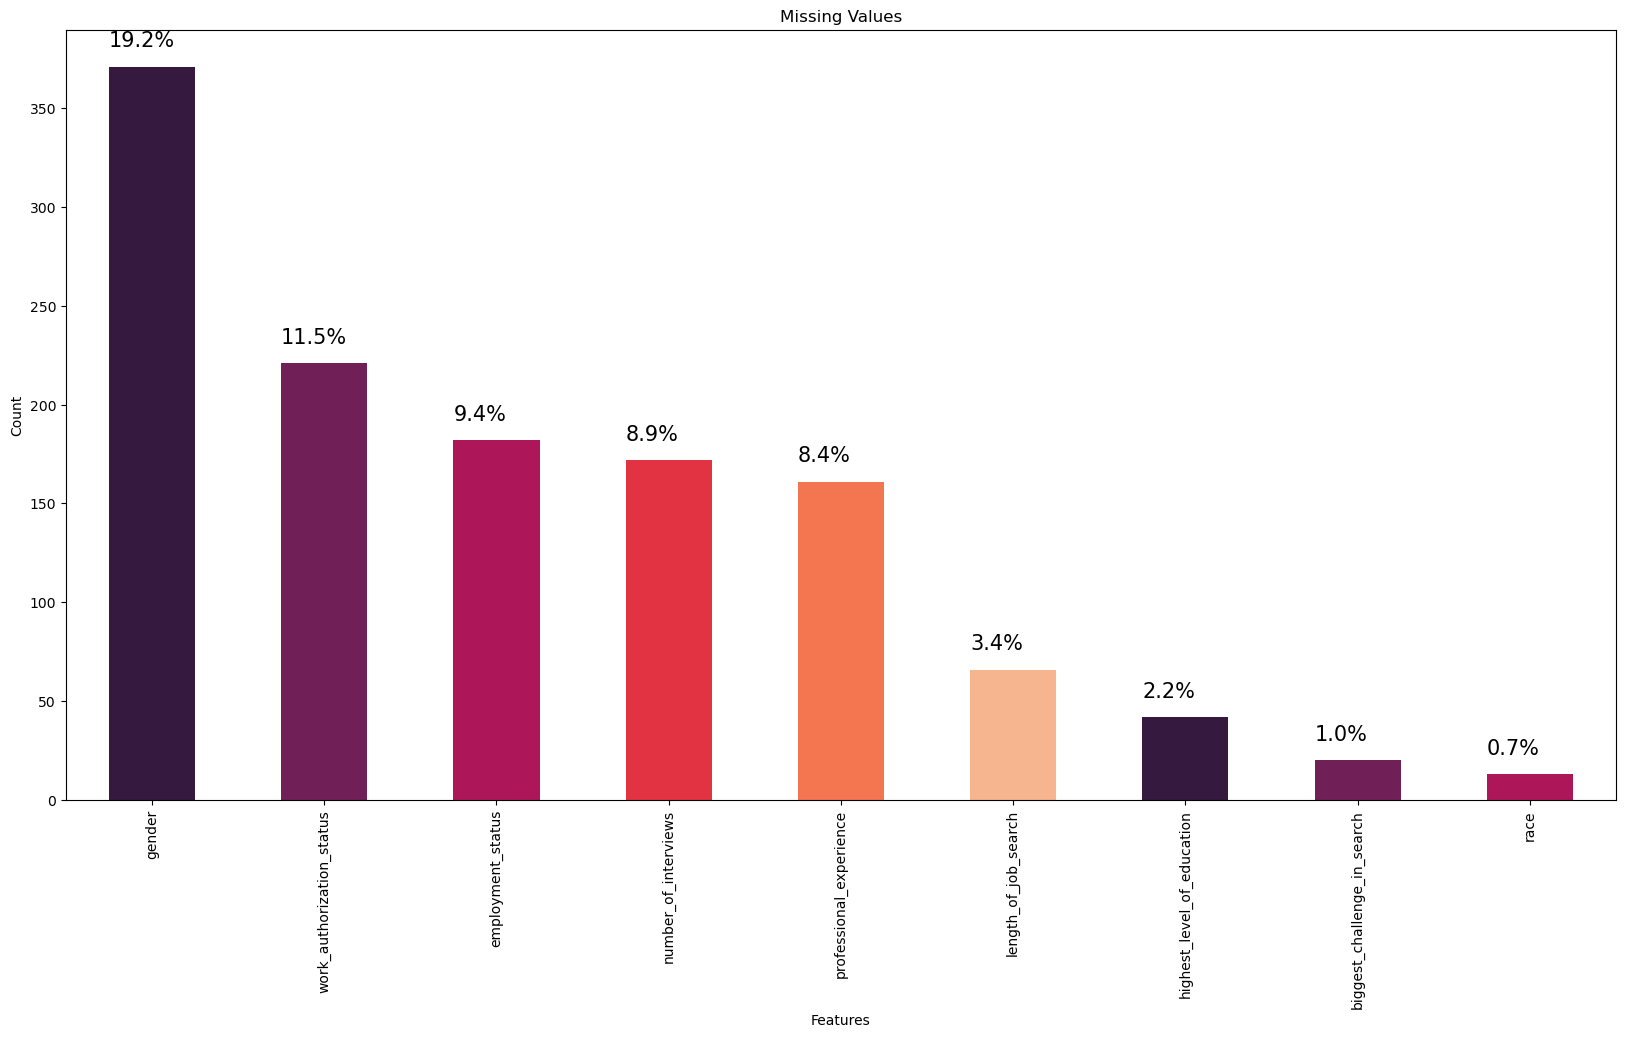

In [21]:
plot_missing_data(df)

In [22]:
df.columns=df.columns.str.strip()

### Imputing Missing Values

We will encode the missing data as its own category since the missing data itself might provide valuable insights.                                                                                                                   We only filled in the 'number_of_interviews' with the median.

In [23]:
df['gender'].fillna('Missing_gender',inplace=True)

In [24]:
df['work_authorization_status'].fillna('Missing_work_autho',inplace=True)

In [25]:
df['employment_status'].fillna('Missing_employment_status',inplace=True)

In [26]:
df['number_of_interviews'].fillna(df['number_of_interviews'].median(),inplace=True)

In [27]:
df['professional_experience'].fillna('Missing_pro_exp',inplace=True)

In [28]:
df['length_of_job_search'].fillna('Missing_job_search_len',inplace=True)

In [29]:
df['highest_level_of_education'].fillna('Missing_edu_lvl',inplace=True)

We will remove rows missing in 'biggest_challenge_in_search' and 'race' because their percentage is below one percent, and this dataset is sufficiently large.

In [30]:
df.dropna(subset=['biggest_challenge_in_search','race'],inplace=True)

### Feature Engineering

The dummy method has been used to convert non-numeric columns to numeric.

In [31]:
df_dummy=pd.get_dummies(df[['primary_track','employment_status','highest_level_of_education','length_of_job_search','biggest_challenge_in_search','professional_experience','work_authorization_status','gender','race']])

In [32]:
df=df.drop(['primary_track', 'employment_status', 'highest_level_of_education', 'length_of_job_search', 'biggest_challenge_in_search','professional_experience','work_authorization_status','gender','race'],axis=1)

In [33]:
df=pd.concat([df, df_dummy], axis=1)

### Preprocessed Data

In [34]:
df.to_csv('Pathrise_Preprocessed_Data.csv')
